In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


In [2]:
# Testing data features
app_test = pd.read_csv('../input/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Training data
app_train = pd.read_csv('../input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [6]:
def TargetEncoder(app_train,app_test) :
    for col in app_train :
        if app_train[col].dtype == 'object':
            cumsum = app_train.groupby(col)['TARGET'].sum()
            cumcnt = app_train.groupby(col)['TARGET'].count()
            for x in list(cumsum.index) :
                c = cumsum.loc[x]/cumcnt.loc[x]
                app_train.loc[app_train[col] == x, col] = c
                app_test.loc[app_test[col] == x, col] = c
            app_train[col] = app_train[col].astype('float64')
            app_test[col] = app_test[col].astype('float64')

In [7]:
TargetEncoder(app_train,app_test)

In [8]:
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0.083459,0.101419,0.085002,0.079616,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0.083459,0.069993,0.085002,0.083249,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0.054783,0.101419,0.072437,0.079616,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0.083459,0.069993,0.085002,0.079616,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0.083459,0.101419,0.085002,0.079616,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
app_train.dtypes.value_counts()

float64    81
int64      41
dtype: int64

In [10]:
app_test.dtypes.value_counts()

float64    81
int64      40
dtype: int64

In [11]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


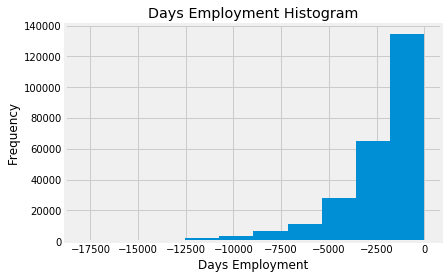

In [12]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [13]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [14]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

In [15]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [16]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


In [17]:
bureau = pd.read_csv('../input/bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


ดูว่ามีการ loan ก่อนหน้านั้นหรือไม่

In [18]:
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU' : 'previous_loan_counts'})

In [19]:
previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [20]:
# Join to the training dataframe
app_train = app_train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Join to the testing dataframe
app_test = app_test.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
app_train['previous_loan_counts'] = app_train['previous_loan_counts'].fillna(0)
app_test['previous_loan_counts'] = app_test['previous_loan_counts'].fillna(0)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,previous_loan_counts
0,100002,1,0.083459,0.101419,0.085002,0.079616,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,8.0
1,100003,0,0.083459,0.069993,0.085002,0.083249,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,4.0
2,100004,0,0.054783,0.101419,0.072437,0.079616,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,2.0
3,100006,0,0.083459,0.069993,0.085002,0.079616,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
4,100007,0,0.083459,0.101419,0.085002,0.079616,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,1.0


In [21]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,previous_loan_counts
0,100001,0.083459,0.069993,0.085002,0.079616,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,7.0
1,100005,0.083459,0.101419,0.085002,0.079616,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,False,3.0
2,100013,0.083459,0.101419,0.072437,0.079616,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,4.0,False,4.0
3,100028,0.083459,0.069993,0.085002,0.079616,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,False,12.0
4,100038,0.083459,0.101419,0.072437,0.083249,1,180000.0,625500.0,32067.0,625500.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0


# คำนวณ columns ที่เกี่ยวกับตัวเลข
เอาตาราง bureau มา Group ตาม SK_ID_CURR

In [22]:
def agg_numeric(df, group_var, df_name) :
    for col in df:
        if col != group_var and 'SK_ID' in col : # เป็น SK_ID แต่ไม่ใช่่สิ่งที่ต้องการจะ group ก็ให้ลบทิ้ง col นั้นไปเลย
            df = df.drop(columns = col)
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number') # ทำตารางใหม่ เอาข้อมูลที่เป็น ตัวเลข เท่านั้น
    numeric_df[group_var] = group_ids # ใส่สิ่งที่จะ group ไปด้วย
    
    agg = numeric_df.groupby(group_var).agg(['count','mean','max','min','sum']).reset_index()
    
    columns = [group_var] # เปลี่ยนชื่อตาราง
    for var in agg.columns.levels[0]:
        if var != group_var:
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))
    agg.columns = columns
    return agg

In [23]:
bureau_agg_new = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var='SK_ID_CURR', df_name='bureau')
bureau_agg_new.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [24]:
app_train = app_train.merge(bureau_agg_new, on = 'SK_ID_CURR', how='left')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,1,0.083459,0.101419,0.085002,0.079616,0,202500.0,406597.5,24700.5,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,0,0.083459,0.069993,0.085002,0.083249,0,270000.0,1293502.5,35698.5,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,0.0
2,100004,0,0.054783,0.101419,0.072437,0.079616,0,67500.0,135000.0,6750.0,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,0.0
3,100006,0,0.083459,0.069993,0.085002,0.079616,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0.083459,0.101419,0.085002,0.079616,0,121500.0,513000.0,21865.5,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,0.0


In [25]:
app_test = app_test.merge(bureau_agg_new, on = 'SK_ID_CURR', how='left')
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,0.083459,0.069993,0.085002,0.079616,0,135000.0,568800.0,20560.5,450000.0,...,7.0,-93.142857,-6.0,-155.0,-652.0,7.0,3545.357143,10822.50,0.0,24817.500
1,100005,0.083459,0.101419,0.085002,0.079616,0,99000.0,222768.0,17370.0,180000.0,...,3.0,-54.333333,-11.0,-121.0,-163.0,3.0,1420.500000,4261.50,0.0,4261.500
2,100013,0.083459,0.101419,0.072437,0.079616,0,202500.0,663264.0,69777.0,630000.0,...,4.0,-775.500000,-4.0,-1334.0,-3102.0,2.0,0.000000,0.00,0.0,0.000
3,100028,0.083459,0.069993,0.085002,0.079616,2,315000.0,1575000.0,49018.5,1575000.0,...,12.0,-651.500000,-20.0,-1564.0,-7818.0,7.0,3012.010714,12897.09,0.0,21084.075
4,100038,0.083459,0.101419,0.072437,0.083249,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ฟังก์ชันสำหรับการหา correlations ระหว่าข้อมูลในตารางกับ target

In [26]:
# Function to calculate correlations with the target for a dataframe
def target_corrs(df):

    # List of correlations
    corrs = []

    # Iterate through the columns 
    for col in df.columns:
        print(col)
        # Skip the target column
        if col != 'TARGET':
            # Calculate correlation with the target
            corr = df['TARGET'].corr(df[col])

            # Append the list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs

# การจัดการสำหรับข้อมูลแบบ Categorical

จะใช้วิธี Target Encoder

In [27]:
def RenameColumn(df, group_var, df_name):
    # Need to create new column names
    columns = []

    # Iterate through the variables names
    for var in df.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in ['count', 'count_norm']:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    #  Rename the columns
    df.columns = columns

In [28]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [29]:
bureau.shape

(1716428, 17)

In [30]:
#test_bureau.columns.to_series().groupby(test_bureau.dtypes).groups

In [31]:
app_train.dtypes.value_counts()

float64    143
int64       40
bool         1
dtype: int64

In [32]:
train_cols = ['SK_ID_CURR','TARGET']
app_train_temp = app_train.copy()
app_train_temp = app_train_temp[train_cols]
app_train_temp.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [33]:
test_cols = ['SK_ID_CURR']
app_test_temp = app_test.copy()
app_test_temp = app_test_temp[test_cols]
app_test_temp.head()

,SK_ID_CURR
0,100001
1,100005
2,100013
3,100028
4,100038


In [34]:
app_train_temp.shape

(307511, 2)

In [35]:
skIdCurr = bureau['SK_ID_CURR']
bureau_obj_cols = bureau.select_dtypes('object')
bureau_obj_cols['SK_ID_CURR'] = skIdCurr
app_train_temp_bureau_obj_cols = app_train_temp.merge(bureau_obj_cols, how="left")
app_train_temp_bureau_obj_cols.head()

,SK_ID_CURR,TARGET,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,100002,1,Closed,currency 1,Credit card
1,100002,1,Closed,currency 1,Credit card
2,100002,1,Closed,currency 1,Consumer credit
3,100002,1,Closed,currency 1,Consumer credit
4,100002,1,Closed,currency 1,Consumer credit


In [36]:
app_test_temp_bureau_obj_cols = app_test_temp.merge(bureau_obj_cols, how="left")
app_test_temp_bureau_obj_cols.head()

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,100001,Closed,currency 1,Consumer credit
1,100001,Closed,currency 1,Consumer credit
2,100001,Closed,currency 1,Consumer credit
3,100001,Closed,currency 1,Consumer credit
4,100001,Active,currency 1,Consumer credit


In [37]:
print(app_train_temp_bureau_obj_cols.shape)
print(app_train.shape)

(1509345, 5)
(307511, 184)


In [38]:
TargetEncoder(app_train_temp_bureau_obj_cols, app_test_temp_bureau_obj_cols)
app_train_temp_bureau_obj_cols.head()

,SK_ID_CURR,TARGET,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
0,100002,1,0.069311,0.078174,0.088009
1,100002,1,0.069311,0.078174,0.088009
2,100002,1,0.069311,0.078174,0.074837
3,100002,1,0.069311,0.078174,0.074837
4,100002,1,0.069311,0.078174,0.074837


In [39]:
#app_test_temp_bureau_obj_cols.head()

In [40]:
#app_train_temp_bureau_obj_cols.info(verbose=True)

จำแนกเป็น sum และ mean

In [41]:
app_train_bureau_group = app_train_temp_bureau_obj_cols.drop(columns="TARGET").groupby('SK_ID_CURR').agg(['sum', 'mean'])
app_test_bureau_group = app_test_temp_bureau_obj_cols.groupby('SK_ID_CURR').agg(['sum', 'mean'])

In [42]:
RenameColumn(app_train_bureau_group,'SK_ID_CURR','bureau')
RenameColumn(app_test_bureau_group,'SK_ID_CURR','bureau')

In [43]:
app_train_bureau_group.head()

,bureau_CREDIT_ACTIVE_count,bureau_CREDIT_ACTIVE_count_norm,bureau_CREDIT_CURRENCY_count,bureau_CREDIT_CURRENCY_count_norm,bureau_CREDIT_TYPE_count,bureau_CREDIT_TYPE_count_norm
SK_ID_CURR,,,,,,
100002,0.601636,0.075204,0.625392,0.078174,0.651381,0.081423
100003,0.300818,0.075204,0.312696,0.078174,0.325690,0.081423
100004,0.138622,0.069311,0.156348,0.078174,0.149673,0.074837
100006,0.000000,NaN,0.000000,NaN,0.000000,NaN
100007,0.069311,0.069311,0.078174,0.078174,0.074837,0.074837


In [44]:
app_test_bureau_group.head()

,bureau_CREDIT_ACTIVE_count,bureau_CREDIT_ACTIVE_count_norm,bureau_CREDIT_CURRENCY_count,bureau_CREDIT_CURRENCY_count_norm,bureau_CREDIT_TYPE_count,bureau_CREDIT_TYPE_count_norm
SK_ID_CURR,,,,,,
100001,0.555898,0.079414,0.547218,0.078174,0.523856,0.074837
100005,0.255080,0.085027,0.234522,0.078174,0.237682,0.079227
100013,0.277244,0.069311,0.312696,0.078174,0.261135,0.065284
100028,0.949601,0.079133,0.938087,0.078174,0.963899,0.080325
100038,0.000000,NaN,0.000000,NaN,0.000000,NaN


In [45]:
app_train_bureau_group = app_train_temp.merge(app_train_bureau_group, left_on = 'SK_ID_CURR', right_index = True, how="left")
app_test_bureau_group = app_test_temp.merge(app_test_bureau_group, left_on = 'SK_ID_CURR', right_index = True, how="left")

In [46]:
app_train_bureau_group.head()

,SK_ID_CURR,TARGET,bureau_CREDIT_ACTIVE_count,bureau_CREDIT_ACTIVE_count_norm,bureau_CREDIT_CURRENCY_count,bureau_CREDIT_CURRENCY_count_norm,bureau_CREDIT_TYPE_count,bureau_CREDIT_TYPE_count_norm
0,100002,1,0.601636,0.075204,0.625392,0.078174,0.651381,0.081423
1,100003,0,0.300818,0.075204,0.312696,0.078174,0.325690,0.081423
2,100004,0,0.138622,0.069311,0.156348,0.078174,0.149673,0.074837
3,100006,0,0.000000,NaN,0.000000,NaN,0.000000,NaN
4,100007,0,0.069311,0.069311,0.078174,0.078174,0.074837,0.074837


In [47]:
app_test_bureau_group.head()

,SK_ID_CURR,bureau_CREDIT_ACTIVE_count,bureau_CREDIT_ACTIVE_count_norm,bureau_CREDIT_CURRENCY_count,bureau_CREDIT_CURRENCY_count_norm,bureau_CREDIT_TYPE_count,bureau_CREDIT_TYPE_count_norm
0,100001,0.555898,0.079414,0.547218,0.078174,0.523856,0.074837
1,100005,0.255080,0.085027,0.234522,0.078174,0.237682,0.079227
2,100013,0.277244,0.069311,0.312696,0.078174,0.261135,0.065284
3,100028,0.949601,0.079133,0.938087,0.078174,0.963899,0.080325
4,100038,0.000000,NaN,0.000000,NaN,0.000000,NaN


In [48]:
def count_categorical2(app_train, app_test, bureau, group_var, df_name) :
    train_cols = ['TARGET'] + [group_var]
    app_train_temp = app_train.copy()
    app_train_temp = app_train_temp[train_cols]
    test_cols = [group_var]
    app_test_temp = app_test.copy()
    app_test_temp = app_test_temp[test_cols]
    
    skIdCurr = bureau['SK_ID_CURR']
    bureau_obj_cols = bureau.select_dtypes('object')
    bureau_obj_cols['SK_ID_CURR'] = skIdCurr
    app_train_temp_bureau_obj_cols = app_train_temp.merge(bureau_obj_cols, how="left")
    app_test_temp_bureau_obj_cols = app_test_temp.merge(bureau_obj_cols, how="left")
    TargetEncoder(app_train_temp_bureau_obj_cols, app_test_temp_bureau_obj_cols)
    
    app_train_bureau_group = app_train_temp_bureau_obj_cols.drop(columns="TARGET").groupby('SK_ID_CURR').agg(['sum', 'mean'])
    app_test_bureau_group = app_test_temp_bureau_obj_cols.groupby('SK_ID_CURR').agg(['sum', 'mean'])
    
    RenameColumn(app_train_bureau_group,'SK_ID_CURR', df_name)
    RenameColumn(app_test_bureau_group,'SK_ID_CURR', df_name)
    
    app_train_bureau_group = app_train_temp.merge(app_train_bureau_group, left_on = 'SK_ID_CURR', right_index = True, how="left")
    app_test_bureau_group = app_test_temp.merge(app_test_bureau_group, left_on = 'SK_ID_CURR', right_index = True, how="left")
    
    return app_train_bureau_group, app_test_bureau_group

In [49]:
app_train_bureau_group, app_test_bureau_group = count_categorical2(app_train, app_test, bureau, group_var='SK_ID_CURR', df_name='bureau')

In [50]:
app_train_bureau_group.head()

,TARGET,SK_ID_CURR,bureau_CREDIT_ACTIVE_count,bureau_CREDIT_ACTIVE_count_norm,bureau_CREDIT_CURRENCY_count,bureau_CREDIT_CURRENCY_count_norm,bureau_CREDIT_TYPE_count,bureau_CREDIT_TYPE_count_norm
0,1,100002,0.601636,0.075204,0.625392,0.078174,0.651381,0.081423
1,0,100003,0.300818,0.075204,0.312696,0.078174,0.325690,0.081423
2,0,100004,0.138622,0.069311,0.156348,0.078174,0.149673,0.074837
3,0,100006,0.000000,NaN,0.000000,NaN,0.000000,NaN
4,0,100007,0.069311,0.069311,0.078174,0.078174,0.074837,0.074837


In [51]:
app_test_bureau_group.head()

,SK_ID_CURR,bureau_CREDIT_ACTIVE_count,bureau_CREDIT_ACTIVE_count_norm,bureau_CREDIT_CURRENCY_count,bureau_CREDIT_CURRENCY_count_norm,bureau_CREDIT_TYPE_count,bureau_CREDIT_TYPE_count_norm
0,100001,0.555898,0.079414,0.547218,0.078174,0.523856,0.074837
1,100005,0.255080,0.085027,0.234522,0.078174,0.237682,0.079227
2,100013,0.277244,0.069311,0.312696,0.078174,0.261135,0.065284
3,100028,0.949601,0.079133,0.938087,0.078174,0.963899,0.080325
4,100038,0.000000,NaN,0.000000,NaN,0.000000,NaN


ดู correlation

In [52]:
target_corrs(app_train_bureau_group)

TARGET
SK_ID_CURR
bureau_CREDIT_ACTIVE_count
bureau_CREDIT_ACTIVE_count_norm
bureau_CREDIT_CURRENCY_count
bureau_CREDIT_CURRENCY_count_norm
bureau_CREDIT_TYPE_count
bureau_CREDIT_TYPE_count_norm


[('bureau_CREDIT_ACTIVE_count_norm', 0.07984838908758479),
 ('bureau_CREDIT_TYPE_count_norm', 0.06209404493245699),
 ('bureau_CREDIT_CURRENCY_count', -0.009972830198011267),
 ('bureau_CREDIT_CURRENCY_count_norm', 0.007476750384860392),
 ('bureau_CREDIT_ACTIVE_count', -0.003540131260544053),
 ('bureau_CREDIT_TYPE_count', -0.0024757998518446633),
 ('SK_ID_CURR', -0.0021084690181977176)]

In [53]:
app_train = app_train.merge(app_train_bureau_group.drop(columns = 'TARGET'), on = 'SK_ID_CURR', how='left')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum,bureau_CREDIT_ACTIVE_count,bureau_CREDIT_ACTIVE_count_norm,bureau_CREDIT_CURRENCY_count,bureau_CREDIT_CURRENCY_count_norm,bureau_CREDIT_TYPE_count,bureau_CREDIT_TYPE_count_norm
0,100002,1,0.083459,0.101419,0.085002,0.079616,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.601636,0.075204,0.625392,0.078174,0.651381,0.081423
1,100003,0,0.083459,0.069993,0.085002,0.083249,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,0.0,0.300818,0.075204,0.312696,0.078174,0.325690,0.081423
2,100004,0,0.054783,0.101419,0.072437,0.079616,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,0.0,0.138622,0.069311,0.156348,0.078174,0.149673,0.074837
3,100006,0,0.083459,0.069993,0.085002,0.079616,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
4,100007,0,0.083459,0.101419,0.085002,0.079616,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,0.0,0.069311,0.069311,0.078174,0.078174,0.074837,0.074837


In [54]:
app_test = app_test.merge(app_test_bureau_group, on = 'SK_ID_CURR', how='left')
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum,bureau_CREDIT_ACTIVE_count,bureau_CREDIT_ACTIVE_count_norm,bureau_CREDIT_CURRENCY_count,bureau_CREDIT_CURRENCY_count_norm,bureau_CREDIT_TYPE_count,bureau_CREDIT_TYPE_count_norm
0,100001,0.083459,0.069993,0.085002,0.079616,0,135000.0,568800.0,20560.5,450000.0,...,3545.357143,10822.50,0.0,24817.500,0.555898,0.079414,0.547218,0.078174,0.523856,0.074837
1,100005,0.083459,0.101419,0.085002,0.079616,0,99000.0,222768.0,17370.0,180000.0,...,1420.500000,4261.50,0.0,4261.500,0.255080,0.085027,0.234522,0.078174,0.237682,0.079227
2,100013,0.083459,0.101419,0.072437,0.079616,0,202500.0,663264.0,69777.0,630000.0,...,0.000000,0.00,0.0,0.000,0.277244,0.069311,0.312696,0.078174,0.261135,0.065284
3,100028,0.083459,0.069993,0.085002,0.079616,2,315000.0,1575000.0,49018.5,1575000.0,...,3012.010714,12897.09,0.0,21084.075,0.949601,0.079133,0.938087,0.078174,0.963899,0.080325
4,100038,0.083459,0.101419,0.072437,0.083249,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN


# Applying operation to another frame
ลองไปดูที่ตาราง bureau_balance กันบ้าง

In [55]:
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [56]:
bureau_balance = pd.read_csv('../input/bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [57]:
bureau_balance_counts = count_categorical(bureau_balance, group_var='SK_ID_BUREAU', df_name='bureau_balance')
bureau_balance_counts.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


In [58]:
bureau_balance_agg = agg_numeric(bureau_balance, group_var='SK_ID_BUREAU', df_name='bureau_balance')
bureau_balance_agg.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231


In [59]:
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index=True, left_on='SK_ID_BUREAU', how='outer')
bureau_by_loan = bureau_by_loan.merge(bureau[['SK_ID_BUREAU','SK_ID_CURR']], on='SK_ID_BUREAU', how='left')
bureau_by_loan.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,...,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm,SK_ID_CURR
0,5001709,97,-48.0,0,-96,-4656,0,0.000000,0,0.0,...,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402,NaN
1,5001710,83,-41.0,0,-82,-3403,5,0.060241,0,0.0,...,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446,162368.0
2,5001711,4,-1.5,0,-3,-6,3,0.750000,0,0.0,...,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000,162368.0
3,5001712,19,-9.0,0,-18,-171,10,0.526316,0,0.0,...,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000,162368.0
4,5001713,22,-10.5,0,-21,-231,0,0.000000,0,0.0,...,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000,150635.0


In [60]:
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns=['SK_ID_BUREAU']), group_var='SK_ID_CURR', df_name='client')
bureau_balance_by_client.head()

,SK_ID_CURR,client_bureau_balance_MONTHS_BALANCE_count_count,client_bureau_balance_MONTHS_BALANCE_count_mean,client_bureau_balance_MONTHS_BALANCE_count_max,client_bureau_balance_MONTHS_BALANCE_count_min,client_bureau_balance_MONTHS_BALANCE_count_sum,client_bureau_balance_MONTHS_BALANCE_mean_count,client_bureau_balance_MONTHS_BALANCE_mean_mean,client_bureau_balance_MONTHS_BALANCE_mean_max,client_bureau_balance_MONTHS_BALANCE_mean_min,...,client_bureau_balance_STATUS_X_count_count,client_bureau_balance_STATUS_X_count_mean,client_bureau_balance_STATUS_X_count_max,client_bureau_balance_STATUS_X_count_min,client_bureau_balance_STATUS_X_count_sum,client_bureau_balance_STATUS_X_count_norm_count,client_bureau_balance_STATUS_X_count_norm_mean,client_bureau_balance_STATUS_X_count_norm_max,client_bureau_balance_STATUS_X_count_norm_min,client_bureau_balance_STATUS_X_count_norm_sum
0,100001.0,7,24.571429,52,2,172,7,-11.785714,-0.5,-25.5,...,7,4.285714,9,0,30.0,7,0.214590,0.500000,0.0,1.502129
1,100002.0,8,13.750000,22,4,110,8,-21.875000,-1.5,-39.5,...,8,1.875000,3,0,15.0,8,0.161932,0.500000,0.0,1.295455
2,100005.0,3,7.000000,13,3,21,3,-3.000000,-1.0,-6.0,...,3,0.666667,1,0,2.0,3,0.136752,0.333333,0.0,0.410256
3,100010.0,2,36.000000,36,36,72,2,-46.000000,-19.5,-72.5,...,2,0.000000,0,0,0.0,2,0.000000,0.000000,0.0,0.000000
4,100013.0,4,57.500000,69,40,230,4,-28.250000,-19.5,-34.0,...,4,10.250000,40,0,41.0,4,0.254545,1.000000,0.0,1.018182


# เริ่มต้นทำใหม่ทั้งหมด
โดยเคลียร์ของเก่าทิ้ง

In [61]:
import gc
gc.enable()
del app_train, app_test, bureau, bureau_balance, bureau_agg_new, app_train_bureau_group, app_test_bureau_group, bureau_balance_counts,bureau_balance_agg, bureau_by_loan, bureau_balance_by_client
gc.collect()

84

Load data

In [62]:
app_test = pd.read_csv('../input/application_test.csv')
app_train = pd.read_csv('../input/application_train.csv')
bureau = pd.read_csv('../input/bureau.csv')
bureau_balance = pd.read_csv('../input/bureau_balance.csv')

In [63]:
TargetEncoder(app_train,app_test)

นับข้อมูลตัวเลขในตาราง bureau

In [64]:
bureau_agg_new = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var='SK_ID_CURR', df_name='bureau')

นับข้อมูล categorical ในตาราง bureau

In [65]:
app_train_bureau_group, app_test_bureau_group = count_categorical2(app_train, app_test, bureau, group_var='SK_ID_CURR', df_name='bureau')

นับข้อมูล categorical ในตาราง bureau_balance

In [66]:
bureau_balance_counts = count_categorical(bureau_balance, group_var='SK_ID_BUREAU', df_name='bureau_balance')
bureau_balance_counts.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


นับข้อมูล ตัวเลข ในตาราง bureau_balance

In [67]:
bureau_balance_agg = agg_numeric(bureau_balance, group_var='SK_ID_BUREAU', df_name='bureau_balance')
#bureau_balance_agg.head()

นับ count mean max min sum ของการกู้ในแต่ละครั้ง (SK_ID_BUREAU)

In [68]:
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index=True, left_on='SK_ID_BUREAU', how='outer')
bureau_by_loan = bureau_by_loan.merge(bureau[['SK_ID_BUREAU','SK_ID_CURR']], on='SK_ID_BUREAU', how='left')
#bureau_by_loan.head()

นับ bureau_balance รายบุคคล

In [69]:
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns=['SK_ID_BUREAU']), group_var='SK_ID_CURR', df_name='client')
#bureau_balance_by_client.head()

เพิ่ม feature เข้าไป

In [70]:
original_features = list(app_train.columns)
print('Original Feature :', len(original_features))

Original Feature : 122


In [71]:
app_train = app_train.merge(bureau_agg_new, on = 'SK_ID_CURR', how='left')
app_test = app_test.merge(bureau_agg_new, on = 'SK_ID_CURR', how='left')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,1,0.083459,0.101419,0.085002,0.079616,0,202500.0,406597.5,24700.5,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,0,0.083459,0.069993,0.085002,0.083249,0,270000.0,1293502.5,35698.5,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,0.0
2,100004,0,0.054783,0.101419,0.072437,0.079616,0,67500.0,135000.0,6750.0,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,0.0
3,100006,0,0.083459,0.069993,0.085002,0.079616,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0.083459,0.101419,0.085002,0.079616,0,121500.0,513000.0,21865.5,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,0.0


In [72]:
app_train = app_train.merge(app_train_bureau_group.drop(columns = 'TARGET'), on = 'SK_ID_CURR', how='left')
app_test = app_test.merge(app_test_bureau_group, on = 'SK_ID_CURR', how='left')

In [73]:
app_train = app_train.merge(bureau_balance_by_client, on='SK_ID_CURR', how='left')
app_test = app_test.merge(bureau_balance_by_client, on='SK_ID_CURR', how='left')

In [74]:
new_features = list(app_train.columns)
print('New Feature :', len(new_features))

New Feature : 293


## Missing Values

An important consideration is the missing values in the dataframe. Columns with too many missing values might have to be dropped. 

In [75]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [76]:
missing_train = missing_values_table(app_train)
missing_train.head(10)

Your selected dataframe has 293 columns.
There are 235 columns that have missing values.


,Missing Values,% of Total Values
bureau_AMT_ANNUITY_mean,227502,74.0
bureau_AMT_ANNUITY_max,227502,74.0
bureau_AMT_ANNUITY_min,227502,74.0
client_bureau_balance_STATUS_X_count_norm_sum,215280,70.0
client_bureau_balance_MONTHS_BALANCE_mean_mean,215280,70.0
client_bureau_balance_STATUS_3_count_mean,215280,70.0
client_bureau_balance_STATUS_3_count_count,215280,70.0
client_bureau_balance_STATUS_2_count_norm_sum,215280,70.0
client_bureau_balance_STATUS_2_count_norm_min,215280,70.0
client_bureau_balance_STATUS_2_count_norm_max,215280,70.0


We see there are a number of columns with a high percentage of missing values. There is no well-established threshold for removing missing values, and the best course of action depends on the problem. Here, to reduce the number of features, we will remove any columns in either the training or the testing data that have greater than 90% missing values.

In [77]:
missing_train_vars = list(missing_train.index[missing_train['% of Total Values'] > 90])
len(missing_train_vars)

0

Before we remove the missing values, we will find the missing value percentages in the testing data. We'll then remove any columns with greater than 90% missing values in either the training or testing data.
Let's now read in the testing data, perform the same operations, and look at the missing values in the testing data. We already have calculated all the counts and aggregation statistics, so we only need to merge the testing data with the appropriate data. 

In [78]:
missing_test = missing_values_table(app_test)
missing_test.head(10)

Your selected dataframe has 292 columns.
There are 232 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,33495,68.7
COMMONAREA_MODE,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


In [79]:
#app_train.to_csv('train_bureau_raw2.csv', index=False)
#app_test.to_csv('test_bureau_raw2.csv', index=False)

In [80]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,client_bureau_balance_STATUS_X_count_count,client_bureau_balance_STATUS_X_count_mean,client_bureau_balance_STATUS_X_count_max,client_bureau_balance_STATUS_X_count_min,client_bureau_balance_STATUS_X_count_sum,client_bureau_balance_STATUS_X_count_norm_count,client_bureau_balance_STATUS_X_count_norm_mean,client_bureau_balance_STATUS_X_count_norm_max,client_bureau_balance_STATUS_X_count_norm_min,client_bureau_balance_STATUS_X_count_norm_sum
0,100002,1,0.083459,0.101419,0.085002,0.079616,0,202500.0,406597.5,24700.5,...,8.0,1.875,3.0,0.0,15.0,8.0,0.161932,0.5,0.0,1.295455
1,100003,0,0.083459,0.069993,0.085002,0.083249,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,0.054783,0.101419,0.072437,0.079616,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,0.083459,0.069993,0.085002,0.079616,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0.083459,0.101419,0.085002,0.079616,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
app_train.dtypes.value_counts()

float64    252
int64       41
dtype: int64

## Correlations

First let's look at the correlations of the variables with the target. We can see in any of the variables we created have a greater correlation than those already present in the training data (from `application`). 

In [82]:
# Calculate all correlations in dataframe
corrs = app_train.corr()

In [83]:
corrs = corrs.sort_values('TARGET', ascending = False)

# Ten most positive correlations
pd.DataFrame(corrs['TARGET'].head(10))

,TARGET
TARGET,1.000000
bureau_DAYS_CREDIT_mean,0.089729
client_bureau_balance_MONTHS_BALANCE_min_mean,0.089038
OCCUPATION_TYPE,0.081516
bureau_CREDIT_ACTIVE_count_norm,0.079848
DAYS_BIRTH,0.078239
client_bureau_balance_MONTHS_BALANCE_mean_mean,0.076424
bureau_DAYS_CREDIT_min,0.075248
client_bureau_balance_MONTHS_BALANCE_min_min,0.073225
client_bureau_balance_MONTHS_BALANCE_sum_mean,0.072606


In [84]:
# Ten most negative correlations
pd.DataFrame(corrs['TARGET'].dropna().tail(10))

,TARGET
client_bureau_balance_MONTHS_BALANCE_count_min,-0.048224
client_bureau_balance_STATUS_C_count_sum,-0.048912
client_bureau_balance_STATUS_C_count_norm_mean,-0.055936
client_bureau_balance_STATUS_C_count_max,-0.061083
client_bureau_balance_STATUS_C_count_mean,-0.062954
client_bureau_balance_MONTHS_BALANCE_count_max,-0.068792
client_bureau_balance_MONTHS_BALANCE_count_mean,-0.080193
EXT_SOURCE_1,-0.155317
EXT_SOURCE_2,-0.160472
EXT_SOURCE_3,-0.178919


### Collinear Variables

We can calculate not only the correlations of the variables with the target, but also the correlation of each variable with every other variable. This will allow us to see if there are highly collinear variables that should perhaps be removed from the data. 

Let's look for any variables that have a greather than 0.8 correlation with other variables.

In [85]:
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

For each of these pairs of highly correlated variables, we only want to remove one of the variables. The following code creates a set of variables to remove by only adding one of each pair. 

In [86]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  126


We can remove these columns from both the training and the testing datasets. We will have to compare performance after removing these variables with performance keeping these variables (the raw csv files we saved earlier).

In [87]:
train_corrs_removed = app_train.drop(columns = cols_to_remove)
test_corrs_removed = app_test.drop(columns = cols_to_remove)

print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)

Training Corrs Removed Shape:  (307511, 167)
Testing Corrs Removed Shape:  (48744, 166)


In [88]:
#train_corrs_removed.to_csv('train_bureau_corrs_removed2.csv', index = False)
#test_corrs_removed.to_csv('test_bureau_corrs_removed2.csv', index = False)

In [89]:
#################################################

In [90]:
#app_train.shape

In [91]:
app_train = train_corrs_removed
app_test = test_corrs_removed

# Baseline

For a naive baseline, we could guess the same value for all examples on the testing set.  We are asked to predict the probability of not repaying the loan, so if we are entirely unsure, we would guess 0.5 for all observations on the test set. This  will get us a Reciever Operating Characteristic Area Under the Curve (AUC ROC) of 0.5 in the competition ([random guessing on a classification task will score a 0.5](https://stats.stackexchange.com/questions/266387/can-auc-roc-be-between-0-0-5)).

Since we already know what score we are going to get, we don't really need to make a naive baseline guess. Let's use a slightly more sophisticated model for our actual baseline: Logistic Regression.

## Logistic Regression Implementation

Here I will focus on implementing the model rather than explaining the details, but for those who want to learn more about the theory of machine learning algorithms, I recommend both [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do). Both of these books present the theory and also the code needed to make the models (in R and Python respectively). They both teach with the mindset that the best way to learn is by doing, and they are very effective! 

To get a baseline, we will use all of the features after encoding the categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). The following code performs both of these preprocessing steps.

In [92]:
from sklearn.preprocessing import MinMaxScaler, Imputer
train_labels = app_train['TARGET']
# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

/home/burin/.env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Training data shape:  (307511, 166)
Testing data shape:  (48744, 166)


In [93]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [94]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [95]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.076500
1,100005,0.098170
2,100013,0.073234
3,100028,0.070884
4,100038,0.105243


In [96]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline_test.csv', index = False)